In [20]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv("listings.csv")

In [22]:
df = df[["id", "name", "neighbourhood", "zipcode", "latitude", "longitude", "is_location_exact", "property_type", 
           "bedrooms", "bathrooms", "price", "number_of_reviews", "first_review", "last_review"]]
df.head()


,id,name,neighbourhood,zipcode,latitude,longitude,is_location_exact,property_type,bedrooms,bathrooms,price,number_of_reviews,first_review,last_review
0,5570,Ocean front condo on the sand,Mission Beach,92109,32.78430,-117.25258,t,Condominium,2.0,1.0,"$2,050.00",0,NaN,NaN
1,8488,Juniper Zen Palace- SD's Best Hood!,South Park,92104,32.72839,-117.12824,t,House,3.0,2.0,$225.00,43,2010-10-13,2020-02-04
2,29967,"Great home, 10 min walk to Beach",Pacific Beach,92109,32.80724,-117.25630,t,Bungalow,2.0,2.0,$225.00,60,2010-07-09,2018-08-09
3,38245,Point Loma: Den downstairs,Loma Portal,92106,32.74202,-117.21870,t,House,1.0,1.0,$75.00,143,2010-09-09,2019-10-20
4,39516,Art Studio Retreat/Rustic Cabin,North Park,92104,32.73188,-117.11918,t,Tiny house,1.0,1.0,$74.00,394,2010-07-20,2020-02-12


In [23]:
df_zillow = pd.read_csv("City_Zhvi_AllHomesV2.csv")


In [24]:
df_zillow = df_zillow[ df_zillow['CountyName'] == 'San Diego County' ]
df_zillow

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
8,54296,San Diego,CA,San Diego-Carlsbad,San Diego County,9,187796.0,187478.0,187235.0,186975.0,...,626283,628519,630429,632456,634223,636446,638247,641719,646089,652175
95,51405,Chula Vista,CA,San Diego-Carlsbad,San Diego County,96,171685.0,171577.0,171423.0,171225.0,...,528246,530361,532205,534134,535694,537697,539463,542819,546763,552215
135,6285,Oceanside,CA,San Diego-Carlsbad,San Diego County,136,153016.0,152951.0,152778.0,152540.0,...,528046,530118,531949,533462,534851,536621,538340,541360,544973,550171
166,11337,Escondido,CA,San Diego-Carlsbad,San Diego County,167,170699.0,170432.0,170209.0,170006.0,...,520575,521930,523415,524655,526060,527445,528842,531347,534648,539482
185,38333,El Cajon,CA,San Diego-Carlsbad,San Diego County,186,175247.0,175015.0,174834.0,174684.0,...,508665,510215,511938,513937,515667,517354,518727,521396,524729,529368
306,41517,Vista,CA,San Diego-Carlsbad,San Diego County,307,159312.0,159123.0,158934.0,158837.0,...,532233,534314,535875,537133,538193,539567,540914,543683,547103,551999
341,3975,Carlsbad,CA,San Diego-Carlsbad,San Diego County,342,255327.0,255354.0,255356.0,255252.0,...,841288,843719,845114,847498,850092,853205,855103,858968,864092,871347
469,40737,San Marcos,CA,San Diego-Carlsbad,San Diego County,470,178977.0,178771.0,178580.0,178500.0,...,581555,583066,584352,585382,586381,587594,588900,591532,594625,598731
614,41025,Spring Valley,CA,San Diego-Carlsbad,San Diego County,615,152275.0,152340.0,152340.0,152389.0,...,474306,476476,478676,480527,482041,483609,485671,489031,493430,498728
644,46089,La Mesa,CA,San Diego-Carlsbad,San Diego County,645,170821.0,170740.0,170835.0,171071.0,...,553743,555290,556998,559375,561656,563991,565359,568021,571712,577092


In [25]:
columns = df_zillow.columns.to_numpy()

for col in columns:
    year = col[0:4]
    if year < '2007':
        df_zillow = df_zillow.drop( columns = col, axis = 1)
df_zillow = df_zillow.drop( columns = ['RegionID', 'Metro', 'CountyName', 'State'], axis = 1)      

In [26]:
df_zillow = df_zillow.reset_index()
df_zillow = df_zillow.drop( columns = 'index', axis = 1 )
df_zillow

,RegionName,SizeRank,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,San Diego,9,543915.0,541046.0,535320.0,529617.0,523063.0,519796.0,515688.0,513537.0,...,626283,628519,630429,632456,634223,636446,638247,641719,646089,652175
1,Chula Vista,96,518938.0,516426.0,510813.0,505354.0,499201.0,495387.0,490566.0,486877.0,...,528246,530361,532205,534134,535694,537697,539463,542819,546763,552215
2,Oceanside,136,504616.0,501869.0,496288.0,490329.0,483440.0,479842.0,475687.0,473354.0,...,528046,530118,531949,533462,534851,536621,538340,541360,544973,550171
3,Escondido,167,528017.0,525582.0,520034.0,513991.0,506897.0,502937.0,498004.0,494726.0,...,520575,521930,523415,524655,526060,527445,528842,531347,534648,539482
4,El Cajon,186,513510.0,510186.0,504180.0,498411.0,492132.0,489002.0,485369.0,483013.0,...,508665,510215,511938,513937,515667,517354,518727,521396,524729,529368
5,Vista,307,516318.0,513688.0,508018.0,502152.0,495525.0,492273.0,488581.0,486781.0,...,532233,534314,535875,537133,538193,539567,540914,543683,547103,551999
6,Carlsbad,342,704645.0,702096.0,695691.0,689181.0,681789.0,678776.0,675357.0,674474.0,...,841288,843719,845114,847498,850092,853205,855103,858968,864092,871347
7,San Marcos,470,545750.0,542694.0,536421.0,529641.0,522302.0,518809.0,515286.0,513942.0,...,581555,583066,584352,585382,586381,587594,588900,591532,594625,598731
8,Spring Valley,615,476229.0,474108.0,469516.0,465143.0,460156.0,457841.0,454660.0,452287.0,...,474306,476476,478676,480527,482041,483609,485671,489031,493430,498728
9,La Mesa,645,481025.0,478355.0,473058.0,468002.0,462321.0,458660.0,454086.0,450767.0,...,553743,555290,556998,559375,561656,563991,565359,568021,571712,577092


In [27]:
df_zillow_rent = pd.read_csv("City_Zri_AllHomesPlusMultifamily.csv")
df_zillow_rent = df_zillow_rent[df_zillow_rent['CountyName'] == 'San Diego County' ]
df_zillow_rent = df_zillow_rent.reset_index()
df_zillow_rent = df_zillow_rent.drop( columns = 'index', axis = 1 )
df_zillow_rent

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,54296,San Diego,CA,San Diego-Carlsbad,San Diego County,9,2042.0,2045.0,2050.0,2049.0,...,2492.0,2517.0,2538.0,2558.0,2573.0,2583.0,2601.0,2607.0,2611.0,2619.0
1,51405,Chula Vista,CA,San Diego-Carlsbad,San Diego County,93,2004.0,1998.0,2004.0,2002.0,...,2340.0,2359.0,2371.0,2384.0,2398.0,2410.0,2437.0,2421.0,2428.0,2462.0
2,6285,Oceanside,CA,San Diego-Carlsbad,San Diego County,132,1715.0,NaN,1793.0,1775.0,...,2278.0,2312.0,2334.0,2352.0,2362.0,2363.0,2369.0,2383.0,2370.0,2392.0
3,11337,Escondido,CA,San Diego-Carlsbad,San Diego County,162,1726.0,1747.0,1753.0,1739.0,...,2182.0,2232.0,2265.0,2287.0,2305.0,2311.0,2317.0,2314.0,2317.0,2322.0
4,38333,El Cajon,CA,San Diego-Carlsbad,San Diego County,181,1731.0,1746.0,1746.0,1743.0,...,2222.0,2262.0,2284.0,2302.0,2320.0,2328.0,2339.0,2354.0,2331.0,2345.0
5,41517,Vista,CA,San Diego-Carlsbad,San Diego County,301,1855.0,1854.0,1843.0,1833.0,...,2296.0,2351.0,2383.0,2409.0,2426.0,2432.0,2443.0,2435.0,2403.0,2428.0
6,3975,Carlsbad,CA,San Diego-Carlsbad,San Diego County,336,2273.0,2314.0,2317.0,2312.0,...,2799.0,2827.0,2845.0,2861.0,2872.0,2876.0,2904.0,2897.0,2896.0,2895.0
7,40737,San Marcos,CA,San Diego-Carlsbad,San Diego County,461,2013.0,2025.0,2027.0,2033.0,...,2456.0,2472.0,2488.0,2507.0,2522.0,2526.0,2538.0,2541.0,2529.0,2538.0
8,41025,Spring Valley,CA,San Diego-Carlsbad,San Diego County,602,1755.0,1785.0,1796.0,1792.0,...,2202.0,2234.0,2251.0,2269.0,2286.0,2289.0,2312.0,2316.0,2314.0,2328.0
9,46089,La Mesa,CA,San Diego-Carlsbad,San Diego County,631,1807.0,1833.0,1846.0,1847.0,...,2255.0,2287.0,2307.0,2323.0,2338.0,2347.0,2366.0,2352.0,2355.0,2375.0


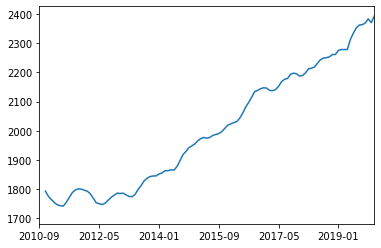

In [38]:
oceanside = df_zillow_rent[df_zillow_rent["RegionName"] == "Oceanside"].squeeze()
oceanside.iloc[6:].plot()
#plt.show()